## To Predict the calories burned depending on the  given factors.

[Download Datasets](https://www.kaggle.com/fmendes/fmendesdat263xdemos)

So the idea is to predict the calories burned from the knowladge of factors like duration of exercise, heart rate, body temperature, age, weight, height and gender. 
There may be some factors whic may not have a strong correlation with the output variable and can be eliminated for the purpose of model building 



#### Importing Libraries

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [255]:
calories=pd.read_csv('calories.csv',index_col=False)
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [256]:
exercise=pd.read_csv('exercise.csv',index_col=False)
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


>The **exercise.csv** contains all the factors that affects the Calories wrt User_ID and the **calories.csv** contains the calories burned wrt to the User_ID.
 
Therefore merging the data by column **User_ID**

In [257]:
data=pd.merge(calories,exercise,on='User_ID')
data=data.drop(['User_ID'],axis=1)
data.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [258]:
data.shape

(15000, 8)

In [259]:
print("Null Values Present\n\n",data.isnull().sum())

Null Values Present

 Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


#### Data Pre-Processing and EDA



> Since Gender is a binary variable so performing one hot encoding on it. 



In [260]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

Features influencing Calories

In [261]:
corr_tbl=data.corr()['Calories'].sort_values(ascending=False)
print(corr_tbl)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64


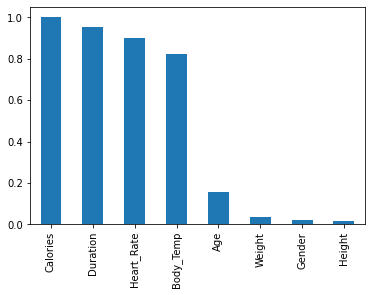

In [262]:
corr_tbl.plot.bar()

>Here we can see the feature that mostly influences the burning of calories is duration of exercise, followed by heart rate and body temperature.
Since the Age , Weight, Gender, Height are not highly correlated so can be dropped.

In [263]:
data1=data.drop(['Age','Weight','Gender','Height'],axis=1)

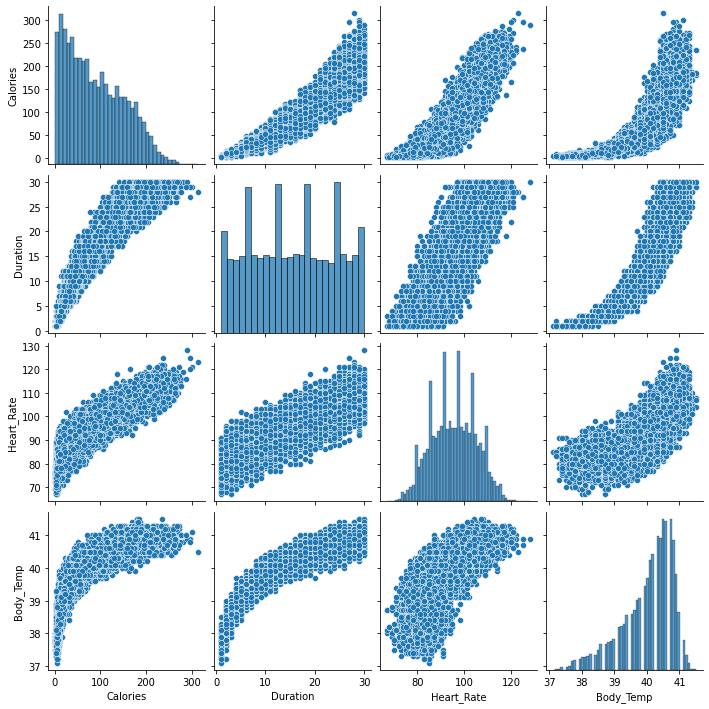

In [264]:
sns.pairplot(data1)

>Here we can see ,all considered factor have a good correlation although their is good correlation it is not perfectly linear in nature . 

So, we can proceed with linear and quadratic regression and check which one results in less error.

Text(0.5, 1.0, 'Calories Burned vs Suration of Exercise')

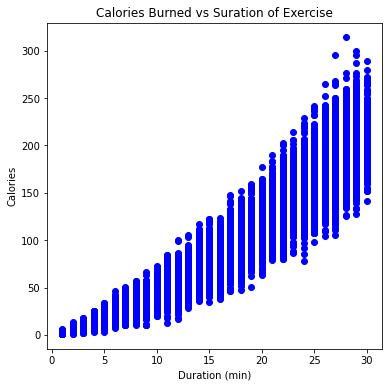

In [265]:
plt.figure(figsize=(6,6))
plt.plot(data1['Duration'],data['Calories'],'bo')
plt.xlabel('Duration (min)')
plt.ylabel('Calories')
plt.title('Calories Burned vs Suration of Exercise')

In [266]:
X=data1[['Duration']];
y=data1['Calories'];

#### Linear Model

In [267]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [268]:
print("Coefficient : ",lr_model.coef_)
print("Intercept : ",lr_model.intercept_)

Coefficient :  [7.17288384]
Intercept :  -21.859656399672318


In [269]:
pred=lr_model.predict(X)

In [270]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("R2 Score :",r2_score(pred,y))
print("Mean Error :",math.sqrt(mean_squared_error(pred,y)))

R2 Score : 0.9045038425422209
Mean Error : 18.4397066961982


In [271]:
pd.DataFrame({"Actual":y,"Lr_model":pred}).head(10)

,Actual,Lr_model
0,231.0,186.153975
1,66.0,78.560717
2,26.0,14.004763
3,71.0,71.387833
4,35.0,49.869182
5,123.0,143.116672
6,112.0,135.943788
7,143.0,157.462440
8,134.0,128.770904
9,72.0,92.906485


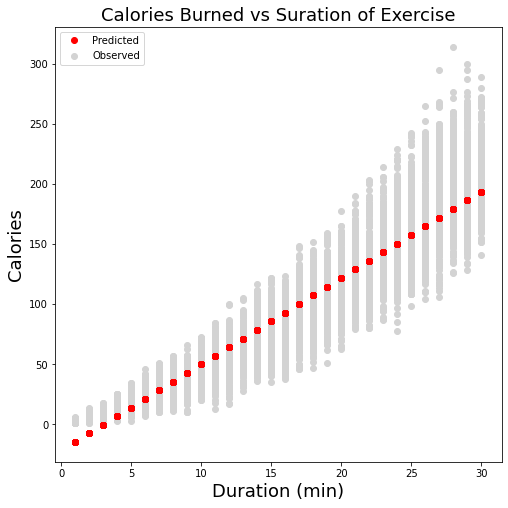

In [272]:
plt.figure(figsize=(8,8))
plt.scatter(X,y,c='lightgray',marker='o',label='Observed')
plt.plot(X,y_pred,"ro",label='Predicted')
plt.xlabel('Duration (min)',size = 18)
plt.ylabel('Calories',size = 18)
plt.title('Calories Burned vs Suration of Exercise',size = 18)
plt.legend()

#### Quadratic Model

In [273]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
print("Coefficient : ",pol_reg.coef_)
print("Intercept : ",pol_reg.intercept_)

Coefficient :  [0.         3.23558061 0.12659848]
Intercept :  -0.0076572187460755


In [275]:
q_pred=pol_reg.predict(poly_reg.fit_transform(X))

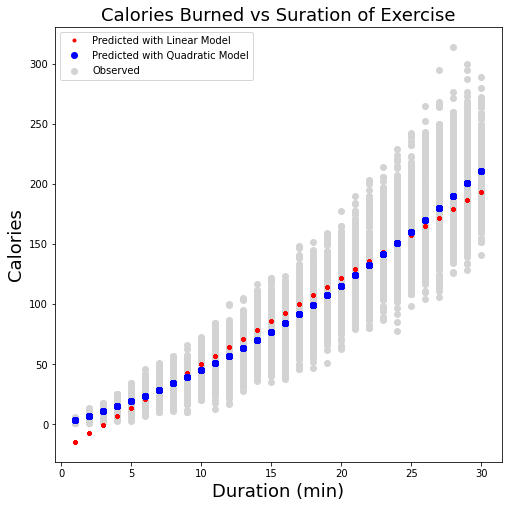

In [276]:
plt.figure(figsize=(8,8))
plt.scatter(X,y,c='lightgray',marker='o',label='Observed')
plt.plot(X,pred,"r.",label='Predicted with Linear Model')
plt.plot(X,q_pred,"bo",label='Predicted with Quadratic Model')
plt.xlabel('Duration (min)',size = 18)
plt.ylabel('Calories',size = 18)
plt.title('Calories Burned vs Suration of Exercise',size = 18)
plt.legend()

In [277]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("R2 Score :",r2_score(q_pred,y))
print("Mean Error :",math.sqrt(mean_squared_error(q_pred,y)))

R2 Score : 0.9234239731399047
Mean Error : 16.65676090890918


#### Differences in Prediction

In [278]:
pd.DataFrame({"Actual":y,"Lr_model":pred,"Quad_model":q_pred}).head(10)

,Actual,Lr_model,Quad_model
0,231.0,186.153975,200.293500
1,66.0,78.560717,70.103773
2,26.0,14.004763,19.335208
3,71.0,71.387833,63.450033
4,35.0,49.869182,45.007997
5,123.0,143.116672,141.381292
6,112.0,135.943788,132.448779
7,143.0,157.462440,160.005907
8,134.0,128.770904,123.769464
9,72.0,92.906485,84.170843


#### Accuracy Comparison

In [279]:
def mean_error(a,b):
  return math.sqrt(mean_squared_error(a,b))

def r2(a,b):
  return r2_score(a,b)*100


model=["Linear Model","Quadratic Model"]
r2_scr=[r2(pred,y),r2(q_pred,y)]
mean_err=[mean_error(pred,y),mean_error(q_pred,y)]


pd.DataFrame({"Models Used":model,"Acuracy":r2_scr,"Mean Error":mean_err})

,Models Used,Acuracy,Mean Error
0,Linear Model,90.450384,18.439707
1,Quadratic Model,92.342397,16.656761




> So it is clearly seen that the quadratic model works better than linear model in the terms of predicting the value close to the actual value 





In [280]:
# Predicting the calories burned by a 40 min workout
print(pol_reg.predict(poly_reg.fit_transform([[40]])))

[331.97313157]


---

**So about 332 calories can be burned by about 40 min of Workout.**



